This notebook illustrate how to define a cross-validation, a classifier, to classify a set a features and to visualize results.
Documentation: https://etiennecmb.github.io/classification.html

# Import librairies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# u can use %matplotlib notebook, but there is some bugs with xticks and title

from brainpipe.classification import *
from brainpipe.visual import *

# Create a random dataset
We are going to create a random dataset for a 2 class problem, n_trials pear class and n_feature. The quality of decoding of features will be increasing with the ranking, meaning that the first feature is going to be a bad one, the second alittle bit better, the third..., the last, the best one.
## Dataset settings

In [2]:
n_trials = 100    # Number of trials pear class
n_features = 15   # Number of features

## Create datasets

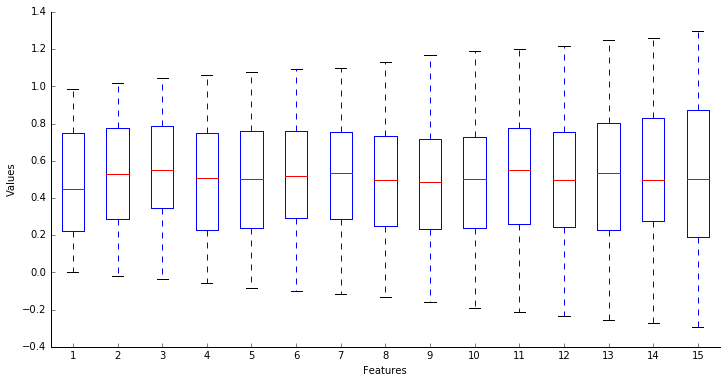

In [3]:
spread = np.linspace(0, 0.3, n_features)
class1 = np.random.uniform(size=(n_trials, n_features)) + spread
class2 = np.random.uniform(size=(n_trials, n_features)) - spread
x = np.concatenate((class1, class2), axis=0)
y = np.ravel([[k]*n_trials for k in np.arange(2)])

plt.figure(0, figsize=(12,6))
plt.boxplot(x);
rmaxis(plt.gca(), ['top', 'right']);
plt.xlabel('Features'), plt.ylabel('Values');

# Classification
## Define a classifier
We are going to create a classifier: a Support Vector Machine with a rbf kernel

In [4]:
model = 'svm'
kern='rbf'
clf_obj = defClf(y, clf=model, kern=kern)

## Define a cross-validation
Here, we create a five times 10-stratified cross-validation

In [5]:
rep = 5
cvmodel = 'skfold'
cv_obj = defCv(y, cvtype=cvmodel, rep=rep)

## Create the classification object
Basically, this object link the cross-validation and the classifier together and provide a bundle of functions.

In [6]:
cla_obj = classify(y, clf=clf_obj, cvtype=cv_obj)

## Be sure of your settings
If you want to be sure of your current settings, you can print embedded tables
### Classifier and cross-validation

In [7]:
cla_obj.info.clfinfo

,"Chance (theorical, %)",Class,Classifier,Cross-validation,Repetition
0,50.0,"[0, 1]",Support Vector Machine (kernel=rbf),"5-times, 10 Stratified k-folds",5


### Statistics

In [8]:
cla_obj.info.statinfo

,"Chance (binomial, %)","Chance (theorical, %)",Class,N-class
0,"{'p_0.05': 56.0, 'p_0.01': 58.0, 'p_0.001': 61.0}",50.0,"[0, 1]",2


## Run the classification
Here, we classify each feature separatly and estimate the significiancy of each one using 20 permutations (randomize vector label 20 times which to at least p<0.05 p-values)

In [9]:
da, pvalue, daperm = cla_obj.fit(x, n_perm=20, method='label_rnd')

## Display features information and save to an excel file

In [10]:
# Export every information to ecel :
filename = 'classification_demo.xlsx'
cla_obj.info.to_excel(filename)

# Display informations about features :
cla_obj.info.featinfo

Settings SVM-rbf / 5-rep_10-skfold                                    \
Results                     DA (%) STD (+/-)     p-values (Binomial)   
0                             47.9      2.22      0.7376888221388045   
1                             55.6      0.49    0.051819519218933796   
2                             55.8       0.6    0.051819519218933796   
3                             60.5       1.0   0.0011397192509029486   
4                             60.3      0.68   0.0018174739762649716   
5                             57.0      0.84    0.020018595806698514   
6                             63.2      0.24   8.209262515823657e-05   
7                             65.2      0.93   6.928725786226053e-06   
8                             64.4      0.73    2.48648673960572e-05   
9                             66.1      0.58  1.7735890870396176e-06   
10                            71.2       0.4   5.149597415154972e-10   
11                            71.7       0.4  2.0076962314874436e-10   
12                            71.7       0.4  2.0076962314874436e-10   
13                            77.2      0.51  1.2212453270876722e-15   
14                            80.9      0.58  1.1102230246251565e-16   

Settings                                
Results  p-values (Permutations) Group  
0                           0.45     0  
1                           0.15     1  
2                           0.05     2  
3                           0.05     3  
4                           0.05     4  
5                           0.05     5  
6                           0.05     6  
7                           0.05     7  
8                           0.05     8  
9                           0.05     9  
10                          0.05    10  
11                          0.05    11  
12                          0.05    12  
13                          0.05    13  
14                          0.05    14

## Plot your results
### Plot decoding

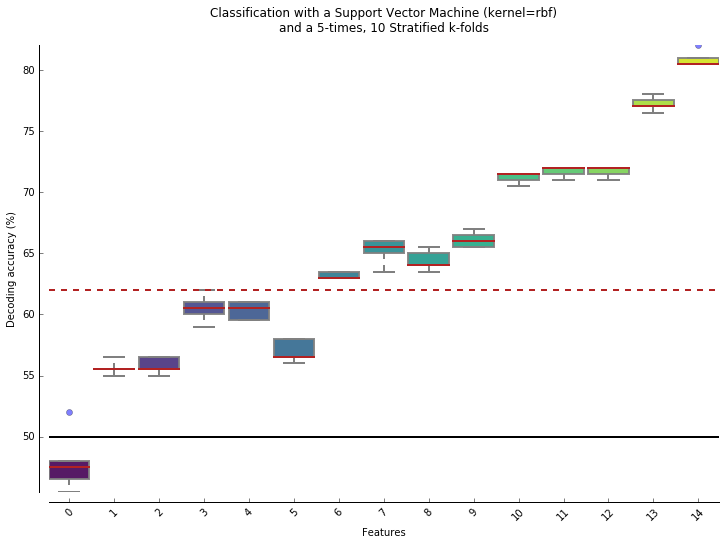

In [11]:
plt.figure(1, figsize=(12,8))

cla_obj.daplot(da, daperm=daperm, chance_method='perm', rmax=['top', 'right'],
               dpax=['bottom', 'left'], cmap='viridis')

### Plot confusion matrix of the last feature only

(2, 2)


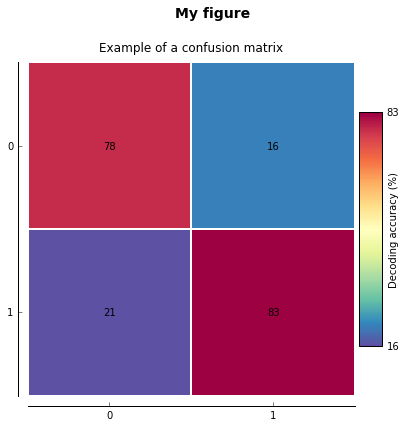

In [25]:
# Get each confusion matrix of each feature :
cm = cla_obj.cm()

# Plot the confusion matrix of the mast feature (-1):
fig2 = plt.figure(2, figsize=(6, 6))
cla_obj.cmplot(fig2, cm[-1, ...], fignum=2, figtitle='My figure', subspace={'top':0.85},
               title='Example of a confusion matrix', vmin=16, vmax=83);

# Save the plot :
fig2.savefig('My_confusion_matrix.png', dpi=300, bbox_inches='tight')

# Introduction to grouping
## The group parameter and multi-features
Previously, we saw how to classify each feature separatly. Now we are going to see how to group features. In this example, we defined 15 features. So, we are going to define 3 groups features
- 'Group1: the bad one': the 5 first
- 'Group2: the middle one': the 3 following
- 'Group3: the best one': the last 7 features

In [13]:
# Define the group parameter :
grp = ['Group1: the bad one']*5 + ['Group2: the middle one']*3 + ['Group3: the best one']*7

# Define a new classification object for this example :
cla_obj2 = classify(y, clf='lda', cvtype='sss', cvArg={'rep':30, 'n_folds':10})

# Run classification, not on each feature, but on each group of features:
da2, pvalue2, daperm2 = cla_obj2.fit(x, grp=grp, method='label_rnd', n_perm=50)

## Plot the grouping decoding

Settings LDA / 30-rep_10-sss                                    \
Results               DA (%) STD (+/-)     p-values (Binomial)   
0                      66.05      2.81  1.7735890870396176e-06   
1          71.61666666666666       3.8  2.0076962314874436e-10   
2          98.66666666666667      0.77  1.1102230246251565e-16   

Settings                                                  
Results  p-values (Permutations)                   Group  
0                           0.02     Group1: the bad one  
1                           0.02  Group2: the middle one  
2                           0.02    Group3: the best one

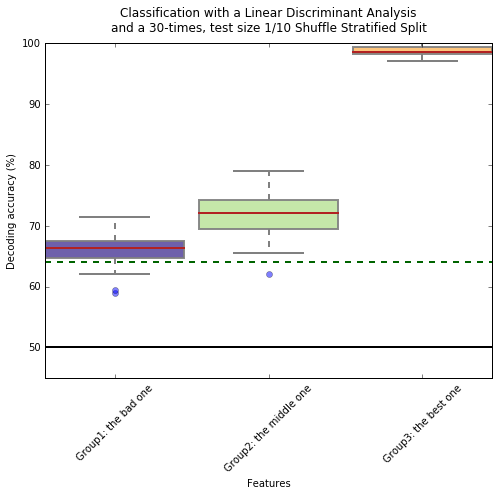

In [14]:
plt.figure(3, figsize=(8, 6))
cla_obj2.daplot(da2, cmap='Spectral_r', ylim=[45, 100], chance_method='perm',
                daperm=daperm2, chance_color='darkgreen');
cla_obj2.info.featinfo

As we can see above, the classification is applied on each group. The mf parameter of the fit() function is just a shortcut to say that all features have to be consider together. 
U can use the grp parameter for:
- Grouping features together
- Labelize each one/group to have nice tables and plot